#Imports and loadings


In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [ ]:
path = '/content/drive/MyDrive/Projet/data/texte'

In [ ]:
import os
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import nltk

# Data Exploration 


## Suppression des données inutiles

In [ ]:
# Importe les données sous la forme :
# Ligne de la chanson - track id - genre - vecteur BOW
df = pd.read_csv(path + '/lyrics_genres_structured.csv')

# On suppprime les colonnes : n° chanson et son id
df.columns
df_genres_and_bags = df.drop(columns=["Unnamed: 0", "msd_track_id"])

# DataFrame contenant les genres et les bags of words de chaque chanson
df_genres_and_bags.head()

,genre,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001
0,Rap,39,30,10,10,28,21,1,20,11,12,9,10,9,1,5,11,4,1,1,17,0,7,4,1,0,2,2,5,1,6,5,4,2,0,1,1,8,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Metal,4,11,19,4,4,2,3,7,2,4,2,0,3,5,0,1,0,6,4,2,5,3,1,0,3,3,0,5,1,2,1,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jazz,23,18,31,0,4,0,3,2,6,0,6,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0,3,2,3,2,0,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pop,11,0,19,0,0,3,1,0,0,1,0,7,1,0,0,0,1,0,0,0,0,1,1,0,2,1,0,0,0,3,0,0,9,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Reggae,13,12,9,3,13,3,0,1,1,0,3,2,0,1,2,4,6,4,0,0,3,11,2,3,2,5,2,1,0,10,4,2,3,0,0,2,3,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Histogramme des genres

In [ ]:
df_genres = df_genres_and_bags['genre']
df_genres.value_counts()

Rock          3228
Pop           2420
Metal         2009
Rap           1347
Country       1089
Electronic     946
RnB            909
Reggae         595
Folk           575
Punk           546
Jazz           451
Latin          286
Blues          186
World           97
New_Age         66
Name: genre, dtype: int64

On a 15 genres de musique différents

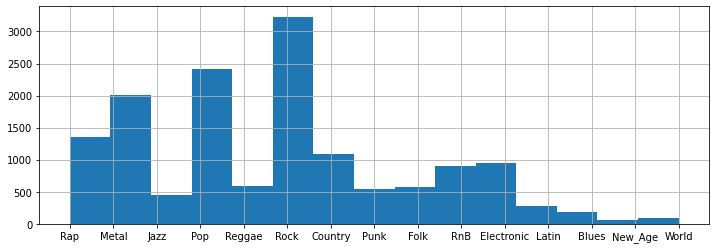

In [ ]:
df_genres.hist(figsize=[12,4], bins=15)

On a une très mauvaise répartition des données. La plus part sont du rap, de la pop ou du rock. Cela va sûrement causer problème lors de l'apprentissage du modèle.

## Répartition des mots

In [ ]:
# On récupérer tout les mots sous forme d'une grande chaine de charactère
with open(path + '/dataset_train.txt', "r") as file:
    vocab = file.readlines()[17]

# Suprression de % et " " : Premier et dernier caractères
vocab = vocab[1:]
vocab = vocab[:-1] 

#Création de la liste de mots dans le vocabulaire
vocab = vocab.split(',')
print("Vocabulaire de 5000 mots :", vocab)

Vocabulaire de 5000 mots : ['i', 'the', 'you', 'to', 'and', 'a', 'me', 'it', 'not', 'in', 'my', 'is', 'of', 'your', 'that', 'do', 'on', 'are', 'we', 'am', 'will', 'all', 'for', 'no', 'be', 'have', 'love', 'so', 'know', 'this', 'but', 'with', 'what', 'just', 'when', 'like', 'now', 'que', 'time', 'can', 'come', 'de', 'there', 'go', 'up', 'oh', 'la', 'one', 'they', 'out', 'down', 'get', 'she', 'was', 'see', 'if', 'got', 'never', 'from', 'he', 'feel', 'want', 'let', 'make', 'way', 'say', 'take', 'would', 'as', 'ca', 'day', 'at', 'babi', 'away', 'life', 'yeah', 'y', 'back', 'by', 'her', 'heart', 'here', 'how', 'could', 'night', 'need', 'our', 'look', 'where', 'en', 'eye', 'thing', 'world', 'more', 'caus', 'gonna', 'die', 'right', 'been', 'tell', 'think', 'un', 'who', 'el', 'through', 'man', 'live', 'again', 'give', 'too', 'onli', 'te', 'tri', 'tu', 'or', 'whi', 'se', 'keep', 'dream', 'well', 'mind', 'an', 'wo', 'still', 'us', 'his', 'long', 'mi', 'girl', 'wanna', 'find', 'fall', 'around', '

In [ ]:
# DataFrame contenant que les bag of word
df_bags = df_genres_and_bags.drop('genre', axis = 1)

(-249.95000000000002, 5248.95, -1.55, 32.55)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, fla

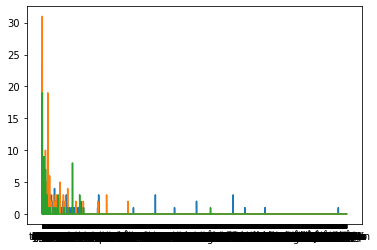

In [ ]:
# DataFrames contenant le vacabulaire d'une chanson ( ici 3 chansons différentes) 
df_bags_line1 = df_bags.iloc[1,:]
df_bags_line2 = df_bags.iloc[2,:]
df_bags_line3 = df_bags.iloc[3,:]

# Affichage de la répartition des mots sur 3 chansons différentes
plt.plot(vocab, df_bags_line1)
plt.plot(vocab, df_bags_line2)
plt.plot(vocab, df_bags_line3)
plt.axis()

Cet exemple montre que certains mots sont très utilisés par toutes les chansons. C'est cas de "i", "the", "and", etc. On les appelle des "stop words" en anglais. Ils ne sont pas très utiles car peu discriminants. 
Cependant, certains mots ont une occurence plus faible. Ce sont eux qui vont nous permettre de classifier les chansons entre elles

# Preprocessing

## Stopword removal

---



In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(df):
    # print(df)
    cpt = 0
    for index, word in enumerate(vocab):
        index += 2
        if word in stopwords:
            cpt += 1
            df = df.drop([str(index)], axis=1)
    # print("Nombre de mots supprimés :", cpt)
    # print(df_bags_stopword)

    return df

In [ ]:
df_bags_stopword = df_genres_and_bags.drop('genre', axis = 1)
df_bags_stopword = remove_stopwords(df_bags_stopword)

Malheureusement la suppression des stopwords n'a pas d'influence sur le score du modèle.

## Données d'entraînement et d'évaluation

In [ ]:
# X_train - Bag of words
X = np.array(df_bags)
print(X)
print(X.shape)

[[39 30 10 ...  0  0  0]
 [ 4 11 19 ...  0  0  0]
 [23 18 31 ...  0  0  0]
 ...
 [11 31 42 ...  0  0  0]
 [ 3 14  0 ...  0  0  0]
 [25  8  6 ...  0  0  0]]
(14750, 5000)


In [ ]:
# Y_train - Label (genres encodés)
#Label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoded = label_encoder.fit_transform(df_genres)

#One hot encoder
y = tf.keras.utils.to_categorical(label_encoded, num_classes=15)
print(y)
print(y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(14750, 15)


In [ ]:
# Séparation des données d'entraînements et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

## Réseau de neurones

In [ ]:
VOCAB_SIZE = X.shape[1] # nbr de mots dans le bag of word (5000)
genre_labels = 15 # nbr de genres à prédire

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(VOCAB_SIZE,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(genre_labels, activation='softmax')) # Couche de classification avec une activation softmax pour obtenir des probabilités

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320064    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 15)                495       
                                                                 
Total params: 322,639
Trainable params: 322,639
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
185/185 [==============================] - 2s 7ms/step - loss: 2.0166 - accuracy: 0.3579
Epoch 2/15
185/185 [==============================] - 1s 6ms/step - loss: 1.5008 - accuracy: 0.5251
Epoch 3/15
185/185 [==============================] - 1s 6ms/step - loss: 1.1505 - accuracy: 0.6358
Epoch 4/15
185/185 [==============================] - 1s 6ms/step - loss: 0.8504 - accuracy: 0.7423
Epoch 5/15
185/185 [==============================] - 1s 6ms/step - loss: 0.6074 - accuracy: 0.8192
Epoch 6/15
185/185 [==============================] - 1s 6ms/step - loss: 0.4203 - accuracy: 0.8834
Epoch 7/15
185/185 [==============================] - 1s 6ms/step - loss: 0.2713 - accuracy: 0.9346
Epoch 8/15
185/185 [==============================] - 1s 6ms/step - loss: 0.1762 - accuracy: 0.9634
Epoch 9/15
185/185 [==============================] - 1s 6ms/step - loss: 0.1153 - accuracy: 0.9814
Epoch 10/15
185/185 [==============================] - 1s 6ms/step - loss: 0.0832 - accuracy: 0.9883

## Evaluation du modèle

In [ ]:
# Précision du modèle
eval = model.evaluate(X_test, y_test)
print("Précision :", eval[1])
roc = roc_auc_score(y_test, model.predict(X_test))
print("ROC score", roc)

93/93 [==============================] - 0s 3ms/step - loss: 5.0831 - accuracy: 0.3851
Précision : 0.38508474826812744
ROC score 0.7859313112354191


## Sauvegarde du model

In [ ]:
model.save(path+'/out_text/text_classifier.h5')
del model